In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib as mpl
from scipy import stats

In [2]:
# setup
pal4 = sns.color_palette("mako",4)
pal3 = sns.color_palette("mako",3)
pal2 = [sns.color_palette("mako",4)[3],sns.color_palette("mako",4)[0]]
pal22 = [sns.color_palette("mako",4)[0],sns.color_palette("mako",4)[3]]
pal='mako'

folder = '../data/'


In [3]:
# functions
def flatten(t):
    return [item for sublist in t for item in sublist]

def fix_strings_list(x):
    return [xxx for xxx in [str(xx.replace("'","").replace(')','').replace('(','').replace(' ','')).replace('[','').replace(']','') for xx in list(x.split(','))] if len(xxx)>0]

def fix_pvals(x):
    if x < 1e-16:
        x=1e-16
    return x

def powerfit(x, y, xnew):
    """line fitting on log-log scale"""
    k, m = np.polyfit(np.log(x), np.log(y), 1)
    return np.exp(m) * xnew**(k)


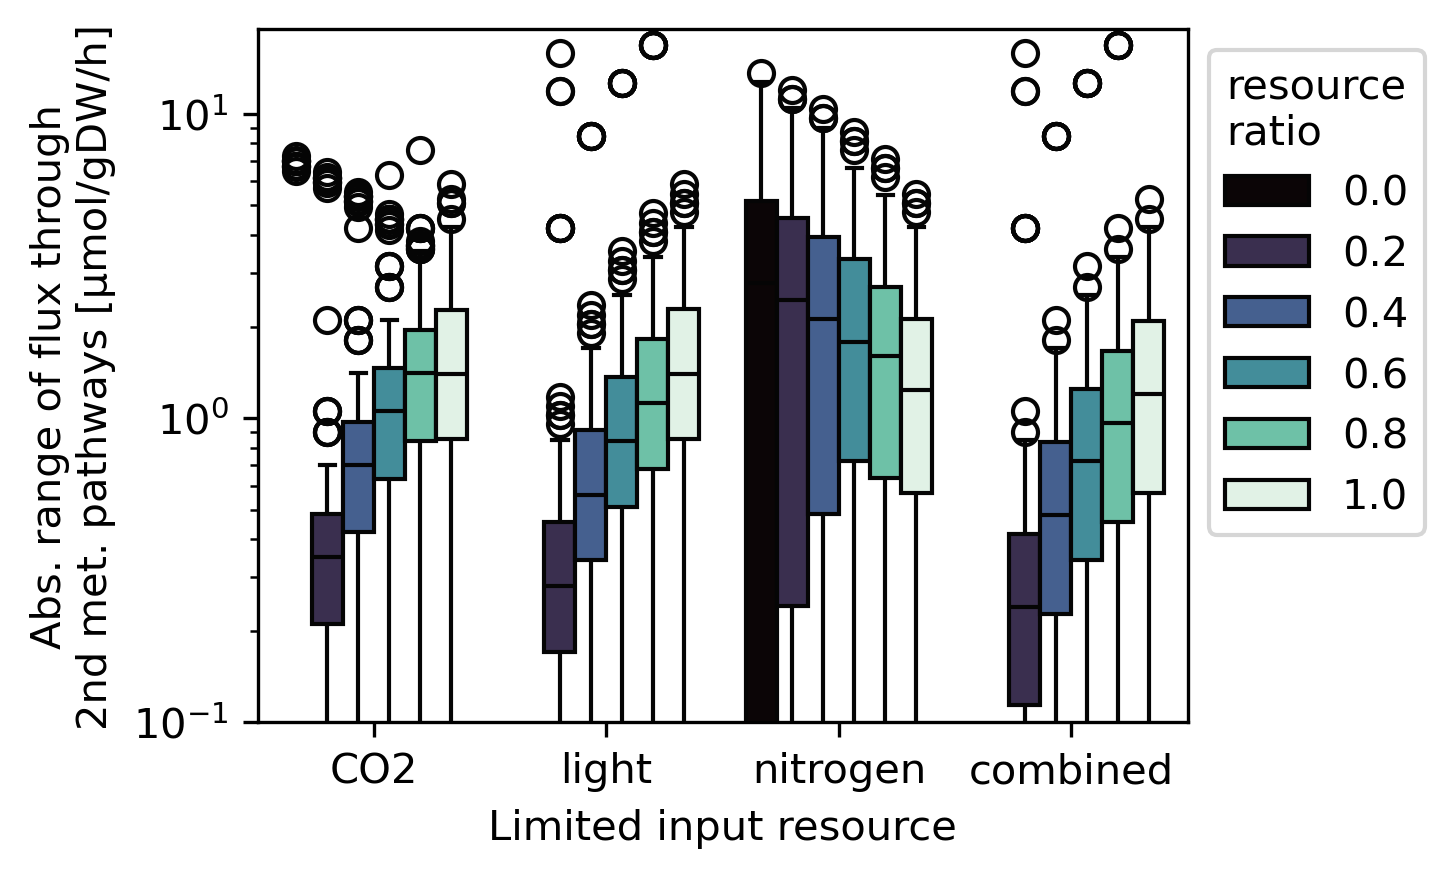

In [4]:
# plot
df = pd.read_csv(folder+'df_resource_limiation_expansion_17_5_25.tsv',sep='\t').query('factor<=1')
df

mpl.rcParams['figure.dpi'] = 300
df['range'] = df.maximum-df.minimum
subset = ['co2','light','n','combined']
plt.figure(figsize=(4,3))
sns.boxplot(data=df.query('resource.isin(@subset)'),
           x='resource',y='range',hue='factor',
            palette=pal
           )
plt.yscale('log')
plt.ylim(0.1,19)
plt.xticks([0,1,2,3],['CO2','light','nitrogen','combined'])
plt.legend(title='resource\nratio',
          bbox_to_anchor=(1,1))
plt.ylabel('Abs. range of flux through\n2nd met. pathways [μmol/gDW/h]')
plt.xlabel('Limited input resource')
plt.show()


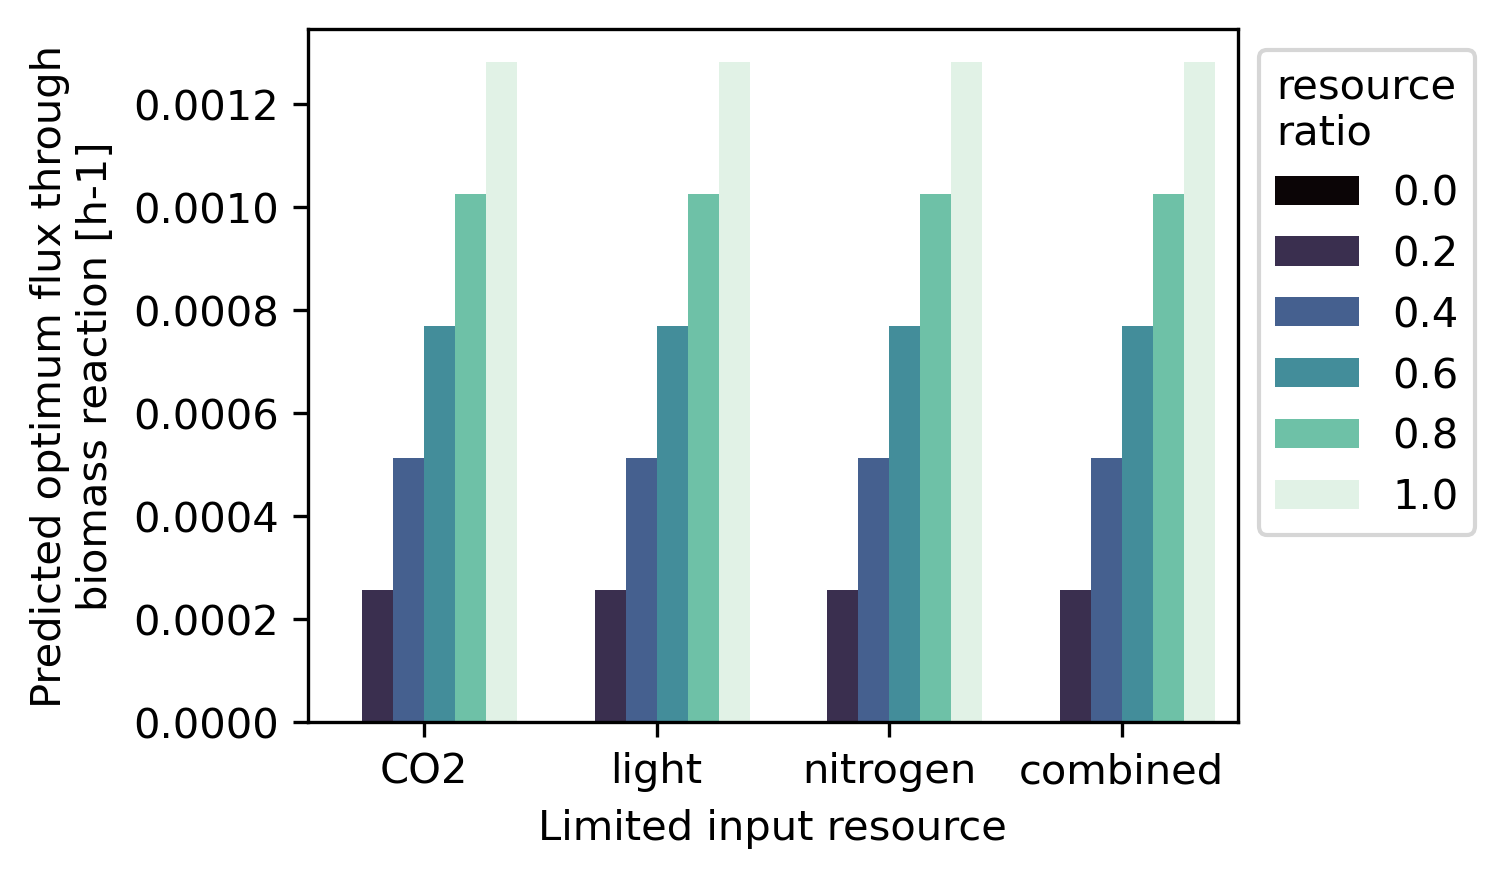

In [5]:
# plot effects on bioopt
mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4,3))
sns.barplot(data=df.query('resource.isin(@subset)'),
            x='resource',y='optbio',hue='factor',
            palette=pal
           )
plt.ylabel('Predicted optimum flux through\nbiomass reaction [h-1]')
plt.xlabel('Limited input resource')
plt.xticks([0,1,2,3],['CO2','light','nitrogen','combined'])
plt.legend(title='resource\nratio',
          bbox_to_anchor=(1,1))
plt.show()

In [6]:
# stats for test

for res in df.resource.unique():
    print(res)
    x = df.query('factor==0').query('resource==@res').range
    y = df.query('factor==1').query('resource==@res').range
    print(x.median())
    print(y.median())
    print(x.median()/y.median())
    print(stats.ranksums(x,y,
               #alternative='less'
         ))

co2
0.0
1.3922420358736223
0.0
RanksumsResult(statistic=np.float64(-13.241873909154064), pvalue=np.float64(5.0278483053176485e-40))
light
0.0
1.39688042949995
0.0
RanksumsResult(statistic=np.float64(-17.039414481879557), pvalue=np.float64(4.189043961283586e-65))
n
2.776221660365187
1.2355056990084081
2.247032662490611
RanksumsResult(statistic=np.float64(3.147102009762374), pvalue=np.float64(0.0016489742170287534))
combined
0.0
1.2000537635806992
0.0
RanksumsResult(statistic=np.float64(-17.039414481879557), pvalue=np.float64(4.189043961283586e-65))


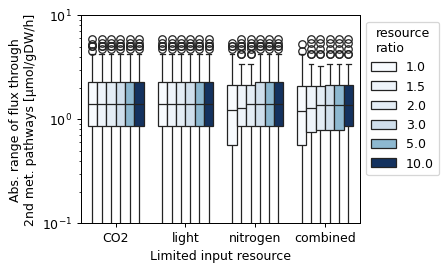

In [7]:
# plot
df = pd.read_csv(folder+'df_resource_limiation_expansion_17_5_25.tsv',sep='\t').query('factor>=1')
df

mpl.rcParams['figure.dpi'] = 90
pal = 'Blues'
df['range'] = df.maximum-df.minimum
subset = ['co2','light','n','combined']
plt.figure(figsize=(4,3))
sns.boxplot(data=df.query('resource.isin(@subset)'),
           x='resource',y='range',hue='factor',
            palette=pal
           )
plt.yscale('log')
plt.ylim(0.1,10)
plt.xticks([0,1,2,3],['CO2','light','nitrogen','combined'])
plt.legend(title='resource\nratio',
          bbox_to_anchor=(1,1))
plt.ylabel('Abs. range of flux through\n2nd met. pathways [μmol/gDW/h]')
plt.xlabel('Limited input resource')
plt.show()


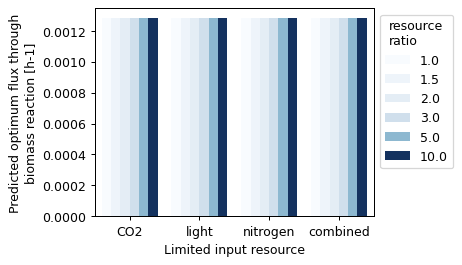

In [8]:
# plot effects on bioopt
mpl.rcParams['figure.dpi'] = 90
plt.figure(figsize=(4,3))
sns.barplot(data=df.query('resource.isin(@subset)'),
            x='resource',y='optbio',hue='factor',
            palette=pal
           )
plt.ylabel('Predicted optimum flux through\nbiomass reaction [h-1]')
plt.xlabel('Limited input resource')
plt.xticks([0,1,2,3],['CO2','light','nitrogen','combined'])
plt.legend(title='resource\nratio',
          bbox_to_anchor=(1,1))
plt.show()